Используя датасет по рукописным буквам английского языка была обучена модель, проведена оценка ее предсказательных способностей. Использовались только полносвязанные слои. Выведены графики точности и потерь для обучающей и тестовой выборки

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

<ipython-input-34-345c6d01b830>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


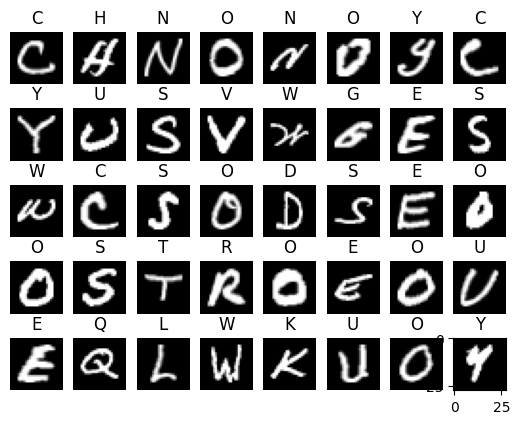

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


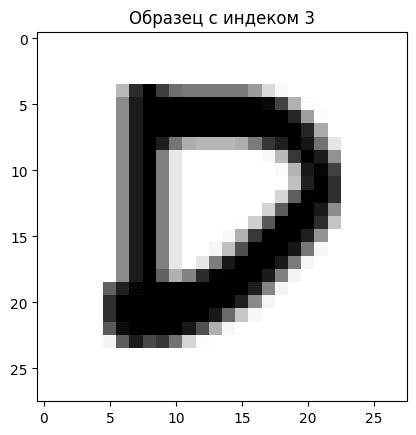

In [ ]:
#Просто посмотреть, что там в prediction заливаться будет

letter = x_test[3]
letter = letter.reshape((28, 28))
fig, ax = plt.subplots(1,1)
ax.set_title('Образец с индеком 3')
ax.imshow(letter, cmap=plt.cm.binary)
plt.show()

In [ ]:
# Ваше решение

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_images = x_train.reshape((-1, 28 * 28))
train_images = x_train.astype('float32') / 255

test_images = x_test.reshape((-1, 28 * 28))
test_images = x_test.astype('float32') / 255

In [ ]:
import numpy as np

def to_one_hot(labels, dimension=26):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(y_train, 26)
test_labels = to_categorical(y_test, 26)

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=6, batch_size=128)

Epoch 1/6
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8757 - loss: 0.4572 - val_accuracy: 0.9641 - val_loss: 0.1291
Epoch 2/6
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.9711 - loss: 0.1044 - val_accuracy: 0.9735 - val_loss: 0.0980
Epoch 3/6
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9799 - loss: 0.0716 - val_accuracy: 0.9766 - val_loss: 0.0875
Epoch 4/6
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9847 - loss: 0.0552 - val_accuracy: 0.9808 - val_loss: 0.0755
Epoch 5/6
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.9887 - loss: 0.0407 - val_accuracy: 0.9797 - val_loss: 0.0774
Epoch 6/6
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9904 - loss: 0.0346 - val_accuracy: 0.9823 - val_loss: 0.0705


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Точность при валидации:', test_acc)
print('Потери при валидации:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9822 - loss: 0.0715
Точность при валидации: 0.9823334217071533
Потери при валидации: 0.0705021396279335


In [ ]:
n = 3
x = test_images[n]

print(x.shape)

(784,)


In [ ]:
import numpy as np

x = np.expand_dims(x, axis=0)

print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(x)
print(f'Вектор результата на 26 выходных нейронах: {prediction}')

pred = np.argmax(prediction)
print(f'Распознана буква: {word_dict.get(pred)}')
print(f'Правильная буква: {word_dict.get(np.argmax(test_labels[n]))}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Вектор результата на 26 выходных нейронах: [[1.53087875e-15 2.63055171e-07 8.08113784e-11 9.99999642e-01
  8.35886985e-11 6.06080344e-13 1.34240749e-13 1.22343456e-18
  2.24487269e-11 1.62333458e-13 6.85943643e-21 5.45717809e-18
  3.37784860e-15 3.25648120e-10 1.70051223e-07 7.70117659e-09
  4.71224726e-11 4.13931639e-10 1.07615713e-11 1.93927007e-14
  1.90904011e-11 8.22495620e-16 1.51840414e-14 1.08505404e-16
  8.23145030e-17 4.93541735e-11]]
Распознана буква: D
Правильная буква: D


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

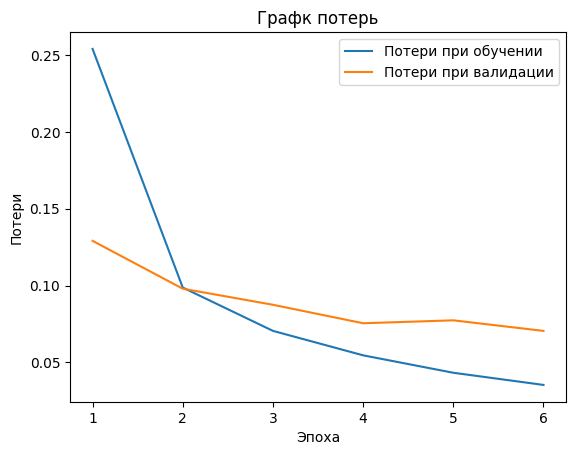

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Потери при обучении')
plt.plot(epochs, val_loss_values, label='Потери при валидации')
plt.title('Графк потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

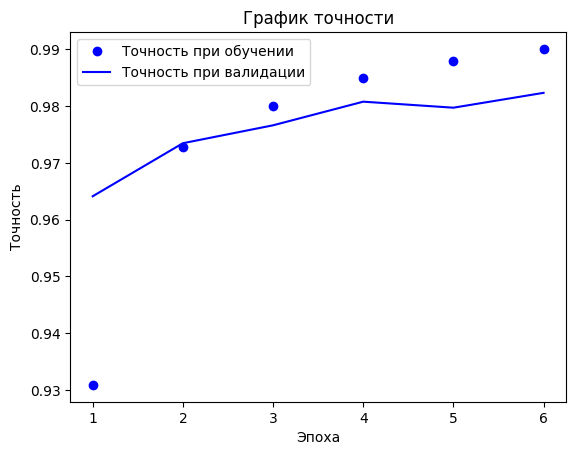

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Точность при обучении')
plt.plot(epochs, val_acc_values, 'b', label='Точность при валидации')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()